In [17]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
!curl -O https://maktabkhooneh.org/media/courses/projects/16325569497737558.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 11323  100 11323    0     0   114k      0 --:--:-- --:--:-- --:--:--  116k


In [18]:
df = pd.read_csv('16325569497737558.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

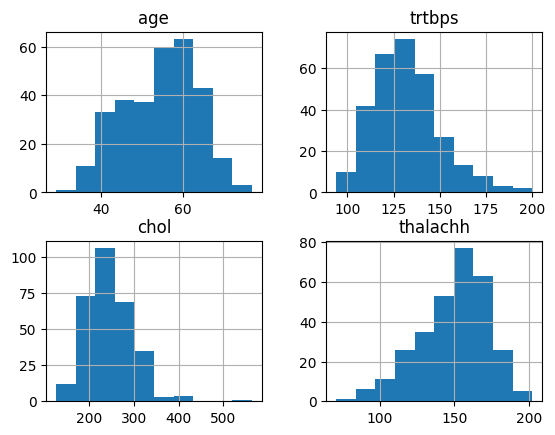

In [20]:
histo = df[['age', 'trtbps', 'chol', 'thalachh']]
histo.hist()
plt.show()

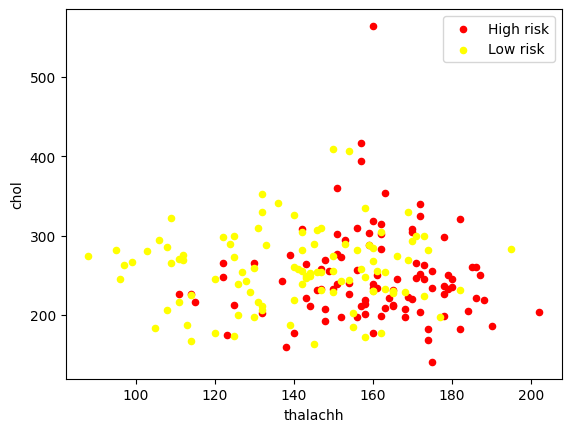

In [21]:
ax = df[df['output'] == 1][0:100].plot(kind='scatter', x='thalachh', y='chol', color='Red', label='High risk');
df[df['output'] == 0][0:100].plot(kind='scatter', x='thalachh', y='chol', color='Yellow', label='Low risk', ax=ax);
plt.show()

In [22]:
X = df[['age', 'sex','cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']]
X[0:5]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [23]:
y = df['output']
y[0:5]

0    1
1    1
2    1
3    1
4    1
Name: output, dtype: int64

In [24]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X.astype(float))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ( X_train.shape,  y_train.shape)
print ( X_test.shape,  y_test.shape)

(242, 13) (242,)
(61, 13) (61,)


In [26]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat = LR.predict(X_test)
yhat

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [28]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

Confusion matrix, without normalization
[[21  4]
 [ 3 33]]


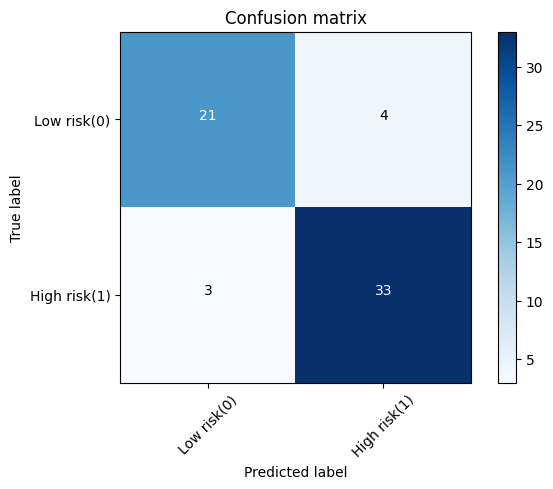

In [29]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Low risk(0)','High risk(1)'],normalize= False,  title='Confusion matrix')

In [30]:
from sklearn.metrics import jaccard_score
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Test set Accuracy:  0.8852459016393442
